In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_x1=pd.read_csv("./X_train.csv", sep=",")
df_x1 = df_x1.drop("最多風向", axis=1)
df_x2 = pd.read_csv("./X_test.csv", sep=",")
df_x2 = df_x2.drop("最多風向", axis=1) #風向の数値化の仕方が分かりませんでした…
df_y = pd.read_csv("./y_train.csv")
y1 = pd.DataFrame({'0.0':0.0}, index =[0]) #初めの数値0.0がタイトル扱いのため、無理やり追加

display(df_x1.head(5))
display(df_x2.head(5))
display(df_y.head(5))

from sklearn .decomposition import PCA

x_t = df_x1.values
x_f = df_x2.values
y = df_y.values
x_t = (x_t - x_t.mean())/x_t.std()
x_f = (x_f - x_f.mean())/x_f.std()

n = np.size(x_t)

pca = PCA(n_components =2)
Data = pca.fit_transform(x_t)
Test = pca.fit_transform(x_f)

,平均気温,最高気温,最低気温,降水量の合計,平均風速,最大風速,最大瞬間風速,平均蒸気圧,平均湿度,最小相対湿度,平均現地気圧,平均海面気圧,最低海面気圧
0,22.4,23.6,20.3,0.0,2.8,5.0,7.6,18.3,67,56,1013.9,1016.7,1015.2
1,18.2,21.3,14.9,6.5,2.8,5.3,9.8,16.2,78,63,1016.9,1019.8,1017.5
2,25.8,31.1,22.3,0.0,2.7,5.3,10.4,25.9,79,52,1006.5,1009.3,1004.7
3,18.4,23.0,16.2,0.0,2.8,5.2,9.4,16.7,80,53,1018.5,1021.4,1017.5
4,25.7,29.6,23.0,0.0,1.8,3.5,5.6,26.6,81,64,1015.6,1018.4,1016.7


,平均気温,最高気温,最低気温,降水量の合計,平均風速,最大風速,最大瞬間風速,平均蒸気圧,平均湿度,最小相対湿度,平均現地気圧,平均海面気圧,最低海面気圧
0,23.3,25.2,20.7,209.5,5.5,17.8,41.5,28.0,98,70,990.7,993.5,966.8
1,25.2,29.7,21.4,0.0,2.2,4.2,7.8,22.2,70,38,1013.6,1016.3,1013.9
2,20.0,25.0,17.3,7.0,2.3,4.4,7.9,18.4,79,58,1018.5,1021.4,1017.4
3,26.0,30.7,20.4,3.5,5.5,11.7,21.4,28.3,85,69,1005.1,1007.9,1004.3
4,29.1,33.3,25.3,8.5,3.1,6.1,12.2,32.6,82,64,1008.9,1011.6,1004.6


,0.0
0,0.0
1,10.6
2,2.6
3,0.5
4,10.1


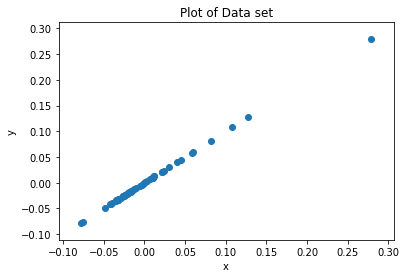

In [65]:
plt.scatter(Data[:],Data[:])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Data set')
plt.show()

In [66]:
X = Data - Data.mean()
y = Test- Test.mean()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Text(0.5, 1.0, 'test')

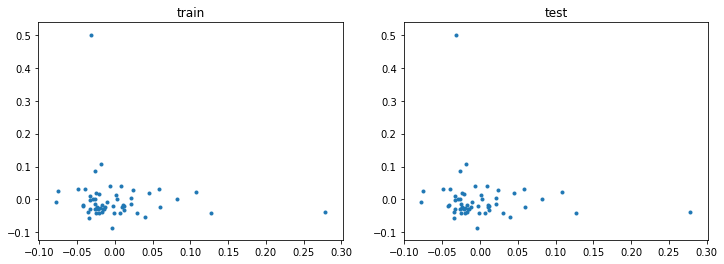

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[0].scatter(X_train, y_train, marker=".")
axes[0].set_title("train")
axes[1].scatter(X_test, y_test, marker=".")
axes[1].set_title("test")
#fig.show()

Text(0.5, 1.0, 'test')

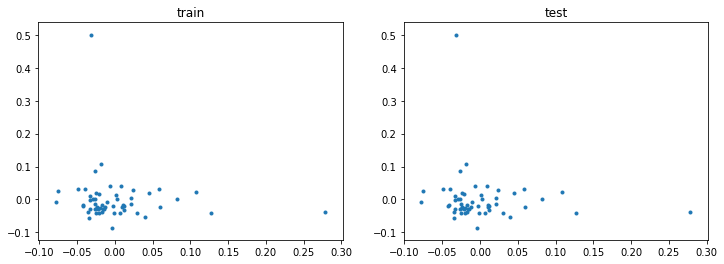

In [74]:
import numpy as np

np.random.seed(0) # random　の挙動を固定

p = np.random.permutation(len(X)) # random　な　index のリスト
X = X[p]
y = y[p]

X_train = X[:1000, :]
y_train = y[:1000]
X_test = X[:1000, :]
y_test = y[:1000]

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[0].scatter(X_train, y_train, marker=".")
axes[0].set_title("train")
axes[1].scatter(X_test, y_test, marker=".")
axes[1].set_title("test")
#fig.show()

In [102]:
n = len(X)

class MyRegression:
    def __init__(self):
        pass
    def calculation():
        numerator = 0
        denominator = 0
        for i in range(n):
            numerator += (X[i] - np.mean(X)) * (y[i] - np.mean(y))
            denominator += (X[i] - np.mean(X)) ** 2
    
        b1 = numerator / denominator
        b0 = np.mean(y) - (b1 * np.mean(X))

        print("coef:",b1, "intercept:",b0)

        #plotting values 
        x_max = np.max(X) + 100
        x_min = np.min(X) - 100

        #calculating line values of x and y
        x = np.linspace(x_min, x_max, 1000)
        y1 = b0[0] + b1[0]* x
        y2 = b0[1] + b1[1]* x
        
        m0 = (b0[0]+b0[1])/2
        m1 = (b1[0]+b1[1])/2
        
        z = m0 + m1*x
        
        return x, y1,y2, z
    

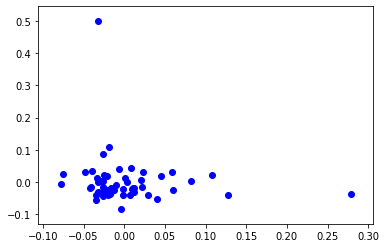

In [103]:
plt.scatter(X, y, color='blue', label='Data Point')

coef: [-0.24883502 -0.02080745] intercept: [-1.48690584e-18 -1.48690584e-18]


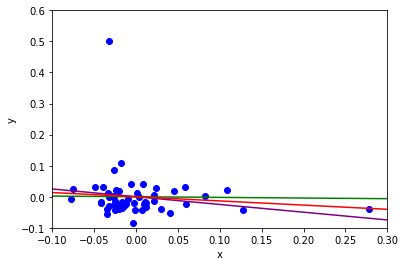

In [104]:
clf = MyRegression
x, y1, y2, z = clf.calculation()

plt.axis([-0.1,0.3,-0.1,0.6])
#plot the data point
plt.scatter(X, y, color='blue', label='Data Point')
#plotting line 
plt.plot(x, y1, color='purple')
plt.plot(x, y2, color='green')
plt.plot(x, z, color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.show()